In [2]:
import numpy as np
import matplotlib.pyplot as plt
from molecule import CaOH, CaH, mu_N, gI
from scipy.constants import h, k
%matplotlib inline

import qls
import utils as ut
import bayesian as bay

In [3]:
b_field_gauss = 3.6
j_max = 10

mo1 = CaH.create_molecule_data(b_field_gauss=b_field_gauss, j_max=j_max)

temperature = 300
states1 = qls.States(mo1, temperature)

B = bay.BayesianStateEstimation(model = mo1, temperature=temperature, b_field_gauss=b_field_gauss, j_max = j_max)

In [4]:
rabi_rate_mhz = 2*np.pi*0.004 


pump_list = {
    'pump_frequency_mhz': -0.002,
    'num_pumps': 200,
    'pump_duration_us': 1000.0,
    'pump_rabi_rate_mhz': rabi_rate_mhz,
    'pump_dephased': False,
    'coherence_time_us': 100,
    'is_minus': True
}


# this changes both the molecule mo1 dataframe (concerning the state_dist) and the B.model molecule (so also the prior)
B.optical_pumping(**pump_list, noise_params = None, seed = None)

In [5]:
pump_list['pump_frequency_mhz'] = -0.006
pump_list['num_pumps'] = 2000

# this changes both the molecule mo1 dataframe (concerning the state_dist) and the B.model molecule (so also the prior)
B.optical_pumping(**pump_list, noise_params = None, seed = None)

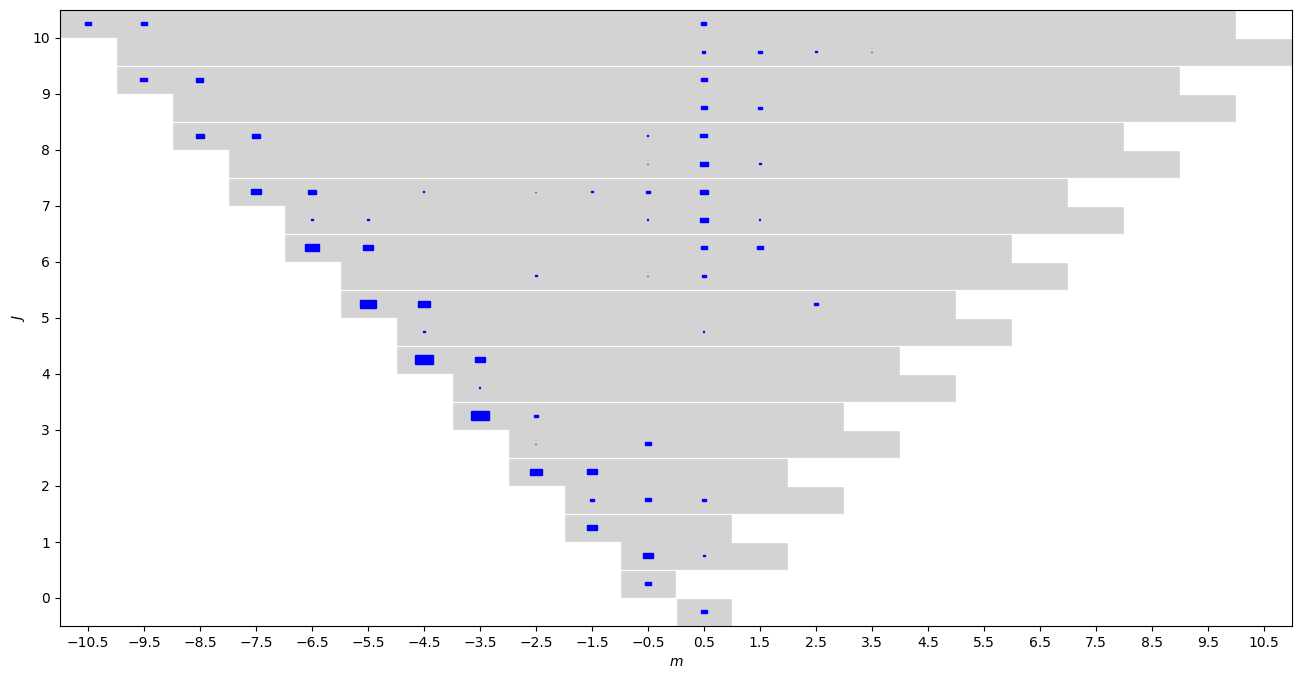

In [6]:
matrix = ut.heatmap_state_pop(mo1.state_df, j_max, normalize = False)
plt.show()

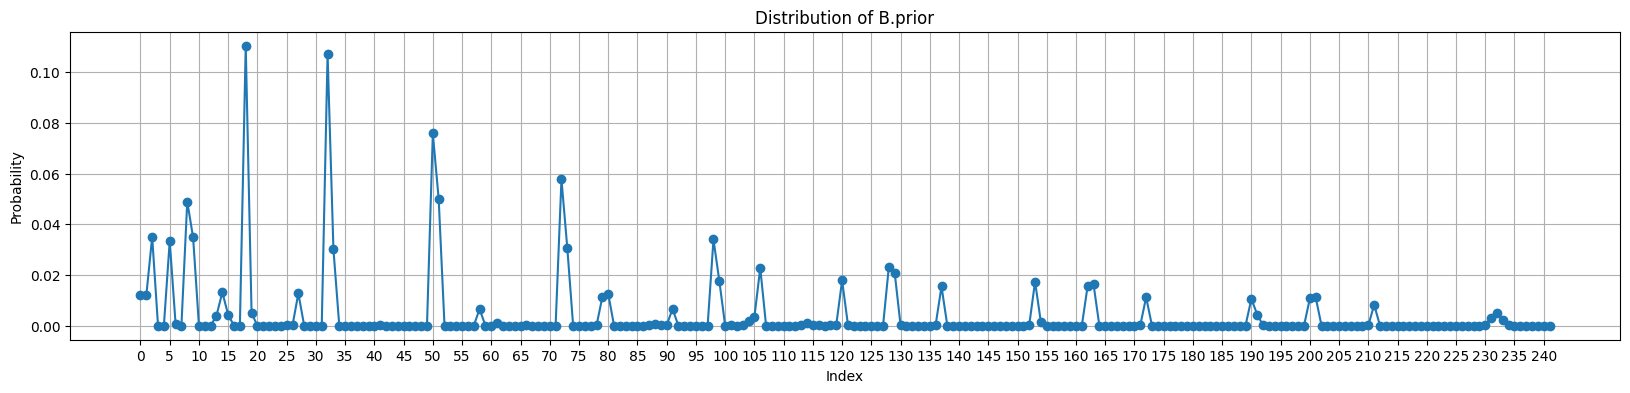

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,4))
# Assumendo che B.prior sia una Series
plt.plot(B.prior, marker="o", linestyle="-")  # Linea con marker sui punti
plt.xticks(np.arange(0, len(B.prior), step = 5))
plt.xlabel("Index")  # Etichetta asse x
plt.ylabel("Probability")  # Etichetta asse y
plt.title("Distribution of B.prior")  # Titolo del grafico
plt.grid(True)  # Aggiunge griglia
plt.show()  # Mostra il plot

In [8]:
B.measurement_setting(rabi_rate_mhz, dephased = False, coherence_time_us = 100, is_minus = True)
# B.measurements            # list of measurements as [frequency, duration, dephased, coh_time, is_minus]
# B.Probs_exc_list          # list of excitation probabilities, one for each measurement setting

In [9]:
B.update_distibution(num_updates=50, apply_pumping=False, save_data=True)

In [54]:
# B.history_list     # history of running the bayesian simulator

In [55]:
# [entry["p0"] for entry in B.history_list]

In [56]:
# [entry["meas_idx"] for entry in B.history_list if entry["outcome"] != 1]

0.030251547808979214


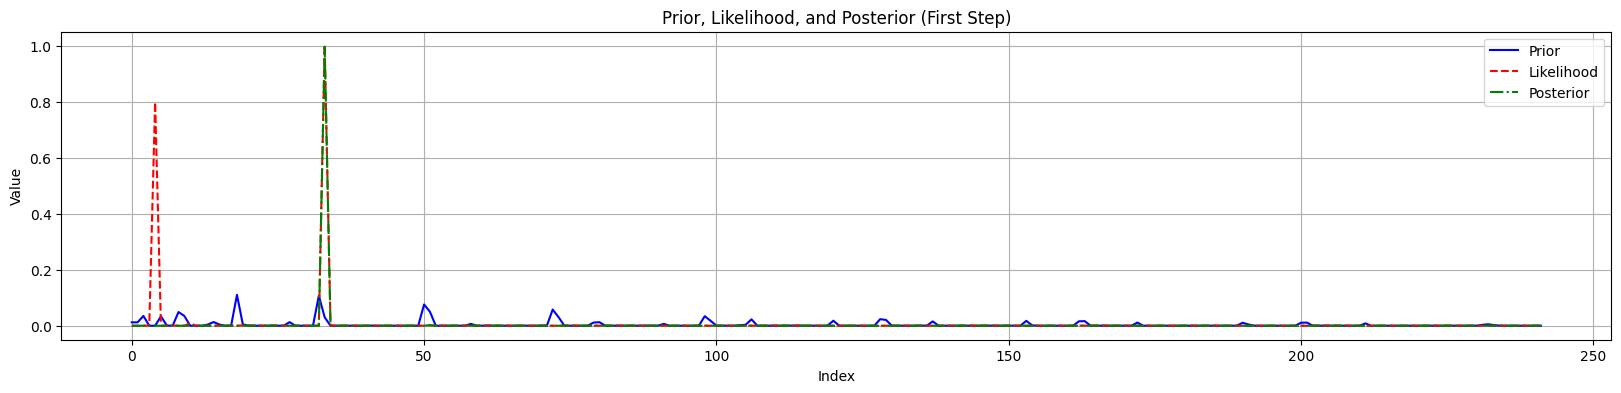

In [10]:
first_entry = B.history_list[0]  

# Estrarre i vettori di prior, likelihood e posterior dal primo step
prior = first_entry["prior"]
likelihood = first_entry["likelihood"]
posterior = first_entry["posterior"]

print(np.sum(np.array(prior)*np.array(likelihood)))

# Indici per l'asse x
indices = list(range(len(prior)))

# Plot
plt.figure(figsize=(20,4))
plt.plot(indices, prior, linestyle="-", color="blue", label="Prior")
plt.plot(indices, likelihood, linestyle="--", color="red", label="Likelihood")
plt.plot(indices, posterior,linestyle="-.", color="green", label="Posterior")

plt.xlabel("Index")
plt.ylabel("Value")
plt.title("Prior, Likelihood, and Posterior (First Step)")
plt.legend()
plt.grid(True)
# plt.xlim(0,40)
plt.show()

MovieWriter ffmpeg unavailable; using Pillow instead.


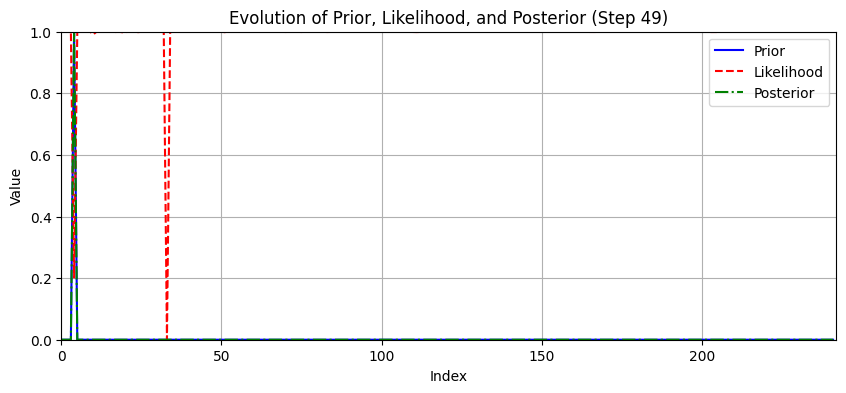

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Get the number of steps in history
num_steps = len(B.history_list)

# Set up the figure
fig, ax = plt.subplots(figsize=(10, 4))

# Initial empty plots
line_prior, = ax.plot([], [], linestyle="-", color="blue", label="Prior")
line_likelihood, = ax.plot([], [], linestyle="--", color="red", label="Likelihood")
line_posterior, = ax.plot([], [], linestyle="-.", color="green", label="Posterior")

ax.set_xlabel("Index")
ax.set_ylabel("Value")
ax.set_title("Evolution of Prior, Likelihood, and Posterior")
ax.legend()
ax.grid(True)

# Set x-limits (assuming all distributions have the same length)
xlim = len(B.history_list[0]["prior"])  # Number of elements in each list
ax.set_xlim(0, xlim)
ax.set_ylim(0, 1)  # Adjust as needed

# Update function for animation
def update(step):
    entry = B.history_list[step]  # Get data from the current step
    prior = np.array(entry["prior"])
    likelihood = np.array(entry["likelihood"])
    posterior = np.array(entry["posterior"])

    line_prior.set_data(range(len(prior)), prior)
    line_likelihood.set_data(range(len(likelihood)), likelihood)
    line_posterior.set_data(range(len(posterior)), posterior)
    
    ax.set_title(f"Evolution of Prior, Likelihood, and Posterior (Step {step})")
    
    return line_prior, line_likelihood, line_posterior

# Create animation
ani = animation.FuncAnimation(fig, update, frames=num_steps, interval=200, blit=False)

ani.save("evolution_plot.gif", writer="ffmpeg", fps=2)

# Show animation
plt.show()


### I try to pump the molecule all the way to the left edge 

In [59]:
b_field_gauss = 3.6
j_max = 14

# mo1 = CaH.create_molecule_data(b_field_gauss=b_field_gauss, j_max=j_max)
mo1 = CaH.create_molecule_data(b_field_gauss=b_field_gauss, j_max=j_max)

temperature = 300
states1 = qls.States(mo1, temperature)

signature_transitions = np.array([mo1.transition_df.loc[mo1.transition_df["j"]==j].iloc[0]["energy_diff"] * 1e-3 for j in range(1, mo1.j_max+1)])


duration_us = 1000.0
rabi_rate_mhz = 2*np.pi*0.005
max_frequency_mhz = 0.05        # 50 kHz
scan_points = 1000
dephased = False
coherence_time_us = 100
is_minus = True

pump_frequency_mhz = -0.002
num_pumps = 200
pump_dephased = True
pump_rabi_rate_mhz = 2*np.pi*0.004
pump_duration_us = 1000.0


qls.apply_pumping(mo1, pump_frequency_mhz, num_pumps, pump_duration_us, pump_rabi_rate_mhz, pump_dephased, coherence_time_us, is_minus)


pump_frequency_mhz = -0.006
qls.apply_pumping(mo1, pump_frequency_mhz, num_pumps, pump_duration_us, pump_rabi_rate_mhz, pump_dephased, coherence_time_us, is_minus)


In [60]:
pump_frequency_mhz = -0.06415
num_pumps = 2000
is_minus = True
qls.apply_pumping(mo1, pump_frequency_mhz, num_pumps, pump_duration_us, pump_rabi_rate_mhz, pump_dephased, coherence_time_us, is_minus)


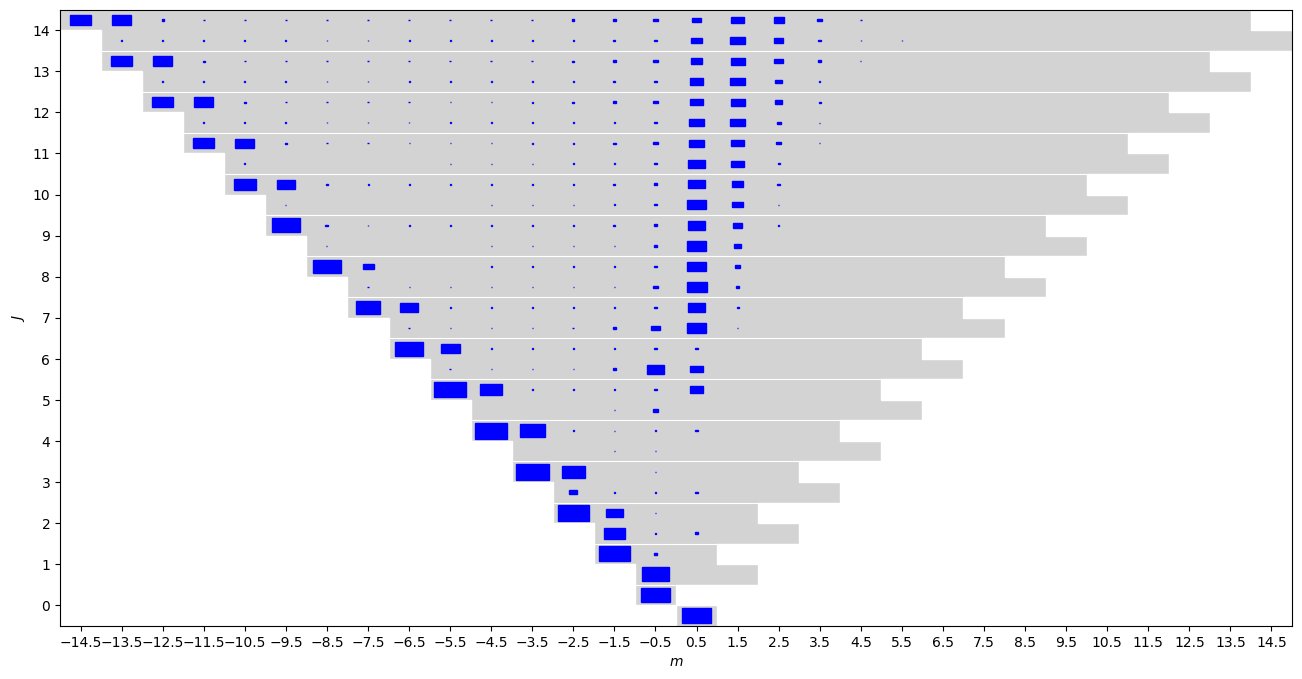

In [61]:
matrix = ut.heatmap_state_pop(mo1.state_df, j_max, normalize = True)
plt.show()